# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXSY1    BPXSY2    BPXDI1    BPXDI2
BPXSY1  1.000000  0.997949  0.368360  0.489900
BPXSY2  0.997949  1.000000  0.427121  0.544705
BPXDI1  0.368360  0.427121  1.000000  0.990938
BPXDI2  0.489900  0.544705  0.990938  1.000000


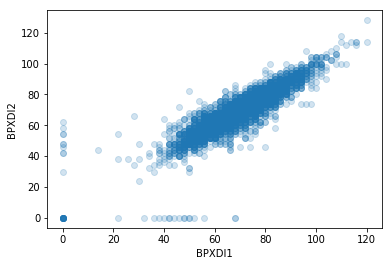

In [3]:
# enter your code here
print(da.loc[0:2,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]].dropna().corr())
#sns.regplot(x = "BPXSY1",y = "BPXSY2",data = da,fit_reg = False,scatter_kws = {"alpha" : 0.2})
sns.regplot(x = "BPXDI1",y = "BPXDI2",data = da,fit_reg = False,scatter_kws = {"alpha" : 0.2})

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation between first and second systolic is slightly higher than first and second diastolic but both are Linear and near 1

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

More Correlated

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

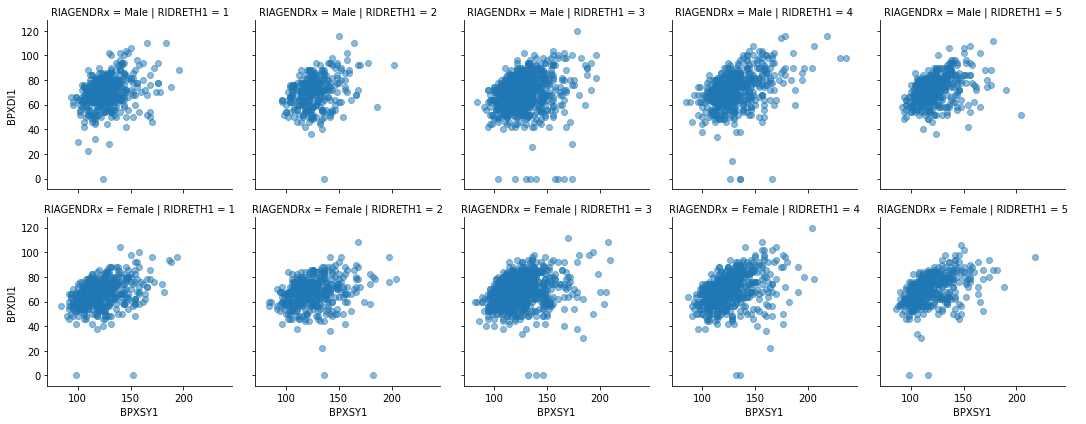

In [4]:
# insert your code here

da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
#da["RIDRETH1x"] = da.RIDRETH1.replace({1:"Mexican American",2:"Other Hispanic",3:"Non-Hispanic White",4:"Non-Hispanic Black",
                                      #5:"Other Race - Including Multi-Racial"})     ->There is no space for graphs,when titles are long
sns.FacetGrid(da,col = "RIDRETH1",row = "RIAGENDRx").map(plt.scatter,"BPXSY1","BPXDI1",alpha = 0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

Correlations are roughly same across all regions,but in the other race/Including multi Racial(column-5) the relationship between first systolic and diastolic blood pressure is stronger especially in Females

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

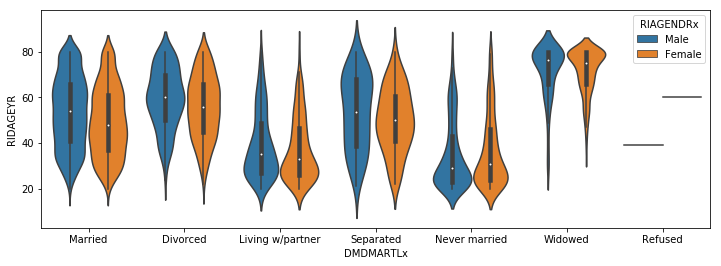

In [5]:
# insert your code here
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
plt.figure(figsize = (12,4))
sns.violinplot(da.DMDMARTLx,da.RIDAGEYR,hue = da.RIAGENDRx)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

Younger people have more live-in partners and are never married whereas older people are more widowed(especially old males)
Younger people are less divorced(likely because they are not married) and living w/partner rate decreases with age(people want stability with age)
Males are more likely to be divorced near and women are more likely to be separated.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


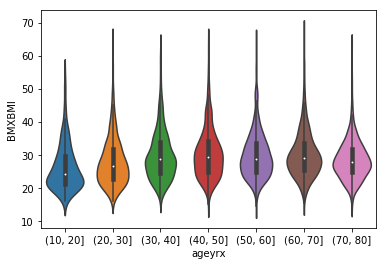

<Figure size 864x864 with 0 Axes>

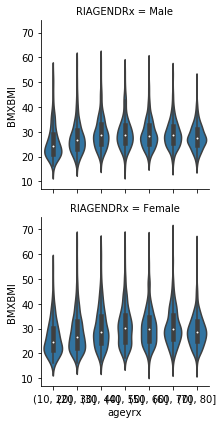

In [9]:
da["ageyrx"] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
d = sns.violinplot(da.ageyrx,da.BMXBMI)
sns.FacetGrid(da,row = "RIAGENDRx").map(sns.violinplot,"ageyrx","BMXBMI").add_legend()  

__Q5a.__ Comment on the trends in BMI across the demographic groups.

BMI OF MALES IS SLIGHTLY HIGHER THAN FEMALES

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [16]:
# insert your code here
da["RIDRETH1x"] = da.RIDRETH1.replace({1:"Mexican American",2:"Other Hispanic",3:"Non-Hispanic White",4:"Non-Hispanic Black",
                                      5:"Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1:"Yes",2:"No",7:"Refused",9:"Don't Know"})
db = da.loc[(da.HIQ210x!="Refused") & (da.HIQ210x!="Don't Know"),:]

x = pd.crosstab(db.RIDRETH1x,db.HIQ210x)
x.apply(lambda z : z/z.sum(),axis = 1)

HIQ210x,No,Yes
RIDRETH1x,,
Mexican American,0.861401,0.138599
Non-Hispanic Black,0.891242,0.108758
Non-Hispanic White,0.932564,0.067436
Other Hispanic,0.871304,0.128696
Other Race - Including Multi-Racial,0.918033,0.081967


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Non-Hispanic White